# Control Systems : Assignment 4 question 13

# Import numpy as np

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import numpy.linalg as ln

# The external force function , can be modellled as per your requirement

In [ ]:
def f1(t):
    return(1)

# PID control implemented below

In [ ]:
m = 4.333
k = 2.551
b =0.442
h=0.1
sigma=0.05 # dirty derivative gain
beta=(2*sigma-h)/(2*sigma+h)
A=np.array([[0,1,0],[0.58,-0.102,0],[-1,0,0]])
B=np.array([[0],[1/m],[0]])

In [ ]:
np.array([B,A@B,A@A@B])

array([[[ 0.        ],
        [ 0.23078698],
        [ 0.        ]],

       [[ 0.23078698],
        [-0.02354027],
        [ 0.        ]],

       [[-0.02354027],
        [ 0.13625756],
        [-0.23078698]]])

In [ ]:
C_AB=np.array([[0.0,0.23,-0.023],[0.23,-0.023,0.13],[0.0,0.0,-0.23]]) # copied from above
aA=np.array([0.253,-0.047,-0.012])
AA=np.array([[1,0.0253,-0.047],[0,1,0.0253],[0,0,1]])

In [ ]:
if ln.det(C_AB)!=0:
    print("controllable")
else:
    print("non controllable")

controllable


In [ ]:
alpha=np.array([1.44,0.439,-0.059])#to be found from polynomial for desired roots.

In [ ]:
K=(alpha-aA)@ln.inv(AA)@ln.inv(C_AB)
KI=K[2]
K=K[:2]

In [ ]:
K,KI

(array([2.49856043, 5.16086957]), 2.6791007245576552)

In [ ]:
global ie,e_dot,x_hat
ie=0.0
e_dot=0
x_hat=np.array([[0.0],[0.0]])
import random as rn
def F(y,t):
    global ie
    global e_dot
    global x_hat
    ie_new =0
    KI=2
    m =5.3331 #*(rn.random()*(0.4)+0.8)
    k =2.5511 #*(rn.random()*(0.4)+0.8)
    b =0.4421 #*(rn.random()*(0.4)+0.8)
    K=np.array([2.49856043, 5.16086957]) # just an copy of K 
    x_hat=update_observe(x_hat,y)
    pos=x_hat[1][0] #+disturbance(t)
    vel=x_hat[0][0] #+disturbance(t)
    # force limit
    force_limit=6 
    #feedback linearized force
    force_fb=f1(t)
    # equlibrium force around pos=0
    x_equi=0
    error=(x_ref(t)-pos)
    if t>0.1:
        ie_new=ie+error*h*0.5
    e_dot=(1-beta)*(ie_new-ie)/h+e_dot*beta
    K=np.array(K)
    force_e=-K@np.array([pos,vel])+KI*error
    #total force 
    force=force_e+force_fb
    #saturate force 
    if abs(force)>force_limit:
        force=force_limit*np.sign(force)
        # integrator anti-windup
        ie=ie+(force_limit-force)/KI
    return(np.array([force,0]))

# Reference motion of mass

In [ ]:
def x_ref(t):
    if (t%100<=49):
        return(-1)
    else:
        return(1)

# Observer  based control

In [ ]:
def update_observe(x_hat,y_m):
    Ts=0.1
    # update the observer using RK4 integration
    F1 = observer_f(x_hat, y_m)
    F2 = observer_f(x_hat + Ts / 2 * F1, y_m)
    F3 = observer_f(x_hat + Ts / 2 * F2, y_m)
    F4 = observer_f(x_hat + Ts * F3, y_m)
    #print(F1+2*F2+2*F3+F4)
    x_hat = x_hat + (0.0166)*(F1+2*F2+2*F3+F4)
    return x_hat

In [ ]:
def observer_f( x_hat, y_m):
    A=np.array([[0,1],[0.59,-0.1]])
    B=np.array([[0],[0.23]])
    C=np.array([1.0,0.0])
    L=np.array([[1.44],[1.646]])
    # compute feedback linearizing torque tau_fl
    #print(x_hat.shape)
    tau_fl = np.array([[0],[1]])
    # xhatdot = A*xhat + B*(u-ue) + L(y-C*xhat)
    xhat_dot = A @ x_hat + B*(tau_fl) +L*(y_m - (C @ x_hat))
    #print(xhat_dot)
    return xhat_dot

In [ ]:
import random
def noise(t):
  return(random.uniform(-0.1, 0.1))

In [ ]:
def disturbance(t):
    if t>0:
      return(0.2)
    else:
      return(0)

# Solving for X''

In [ ]:
def f(y,t):
    # physical constants of the system
    m = 4.333
    k = 2.551
    b =0.442
    A=np.array([[m,0],[0,1]])
    B=np.array([[b,k],[-1,0]])
    return(np.dot(inv(A),F(y,t)-np.dot(B,y)))

# Function for rk4 implementation

In [ ]:
def rk4(y_hat,t,dt):
    k1=f(y_hat,t)
    k2=f(y_hat*k1*0.5*dt,t+dt*0.5)
    k3=f(y_hat*k2*0.5*dt,t+dt*0.5)
    k4=f(y_hat+k3*dt,t+dt)
    return(dt * (k1 + 2*k2 + 2*k3 + k4) /6)

# Function to call state

In [ ]:
def call_state():   
    # initializations matrices
    v_data=[]
    p_data=[]
    y=np.array([0.1,0])
    h=0.1  # dt used during simulation
    time=np.arange(0,1000,h)
    state=[]
    for t in time:
        y=y+rk4(y,t,h)
        state.append(y)
        v_data.append(y[0])
        p_data.append(y[1])
    return(p_data,v_data)

#  Function for Animation

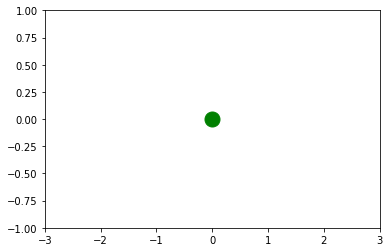

In [ ]:
# initialization of plot , line and point objects
fig = plt.figure() 
ax = plt.axes(xlim=(-3, 3), ylim=(-1, 1)) 
point, = ax.plot(0, 0,marker="o",color="green",markersize=15) 
line, = ax.plot([],[],lw=2)
wall, = ax.plot([],[],lw=2)
def init():
    line.set_data([], []) 
    point.set_data([],[])
    wall.set_data([], []) 
    return point, line,wall
# update the animation with each frame
def animate(frame):
    p,v=call_state()
    point.set_data([p[frame]],[0])
    line.set_data(np.linspace(-3,p[frame],100),np.zeros(100))
    wall.set_data(-3*np.ones(100),np.linspace(-0.5,0.5,100))
    return point,line,wall

In [ ]:
from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate,init_func=init,frames=300, interval=20, blit=False)

In [213]:
from IPython import display
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

# Simulated vs reference behaviour

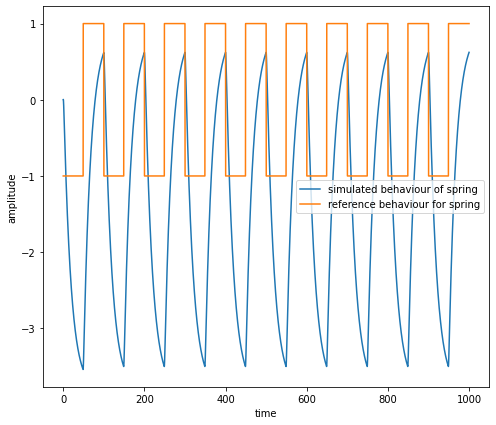

In [ ]:
p,v=call_state()
x=np.arange(0,1000,0.1)
y=[x_ref(i) for i in x ]
plt.figure(figsize=(8,7))
plt.plot(x,p,label="simulated behaviour of spring")
plt.plot(x,y,label="reference behaviour for spring")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend() 
plt.show()